# Netflix Content Analysis Report

# Executive Summary
This analysis explores the Netflix dataset consisting of 8,807 titles. The platform is predominantly composed of Movies rather than TV Shows. Content addition saw massive exponential growth starting in 2015, peaking around 2019. The library targets a mature audience, with "TV-MA" and "TV-14" being the most common content ratings. The typical movie length follows a normal distribution centered around 90-100 minutes.

#  Dataset Overview
Total Records: 8,807 rows

Columns: 12 attributes including show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, and description.

Data Integrity: Missing values were identified in director (2,634 missing), cast (825 missing), and country (831 missing).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('netflix_titles.csv')

#  Data Cleaning and Preprocessing
- To ensure accurate analysis, the following steps were taken:

- Handling Missing Values: Null values in director, cast, and country were filled with "unknown". Nulls in date_added were marked as "not define".

- Data Correction: A data entry error was identified where the duration of some titles was mistakenly recorded in the rating column (e.g., "74 min"). These were shifted to the correct column.

- Feature Engineering:

- duration_min: Extracted integer values from the duration column for Movies to allow for numerical analysis.

- added_year: Extracted the year from the date_added column to analyze timeline trends.

- primary_genre: Extracted the first listed genre from the listed_in column to simplify categorization

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


# Exploratory Data Analysis (EDA)

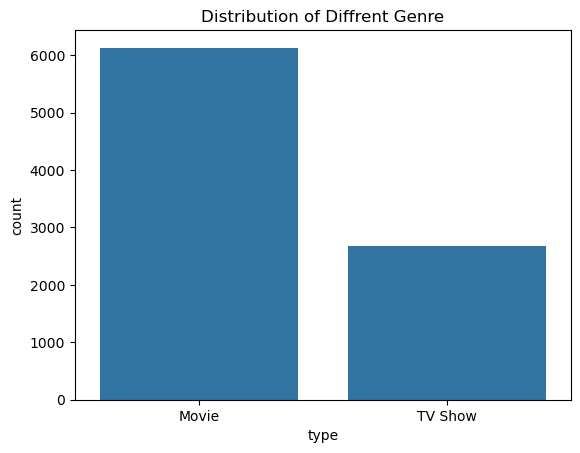

In [6]:
sns.countplot(data = df , x = 'type')
plt.title('Distribution of Diffrent Genre')
plt.show()

# Distribution of Content Types
- Visual: Bar Chart (Movies vs. TV Shows)

- Analysis: The graph clearly shows that Netflix's library is dominated by Movies, which account for roughly 70% of the total content, compared to 30% -for TV Shows.

- Insight: While Netflix has produced many famous original series, their strategy historically relied heavily on acquiring a massive volume of feature films to build out the catalog depth.

In [7]:
df['director']=df['director'].fillna('unknown')
df['cast']=df['cast'].fillna('unknown')
df['country']=df['country'].fillna('unknown')
df['date_added']=df['date_added'].fillna('not define')

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          4
duration        3
listed_in       0
description     0
dtype: int64

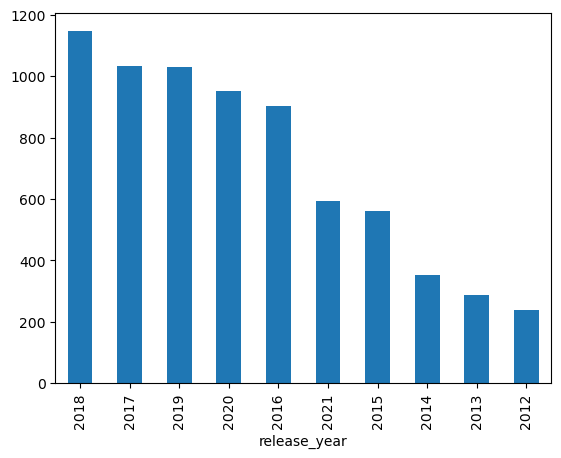

In [10]:
release = df['release_year'].value_counts().head(10)
release.plot(kind='bar')
plt.show()

# Release Year Distribution
- Visual: Bar Chart (Top 10 Release Years)

- Analysis: The most frequent release years for content currently on Netflix are 2018, 2017, and 2019.

- Insight: Netflix prioritizes "fresh" content. Even though they have a back catalog of classics, the bulk of the library consists of titles released in the last 5–7 years, aligning with their focus on Originals and recent licensing deals.

In [11]:
weird_rows = df['rating'].isin(['74 min', '84 min', '66 min'])
df.loc[weird_rows, 'duration'] = df.loc[weird_rows, 'rating']
df.loc[weird_rows, 'rating'] = 'Unknown'

In [12]:
df['duration_min'] = df.loc[df['type']=='Movie', 'duration'].str.replace(' min', '').astype(float)
df['added_year'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce').dt.year
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])

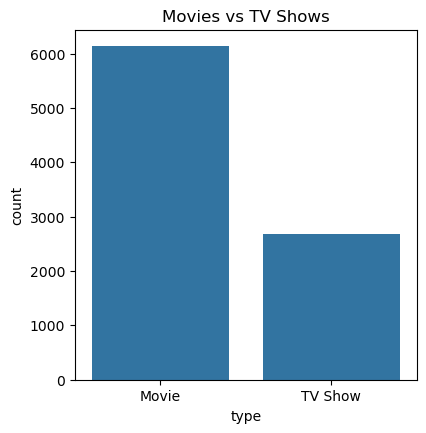

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows')
plt.show()

# Distribution of Content Types
- Visual: Bar Chart (Movies vs. TV Shows)

- Analysis: The graph clearly shows that Netflix's library is dominated by Movies,
which account for roughly 70% of the total content, compared to 30% for TV Shows.

- Insight: While Netflix has produced many famous original series,
their strategy historically relied heavily on acquiring a massive volume of feature
films to build out the catalog depth.

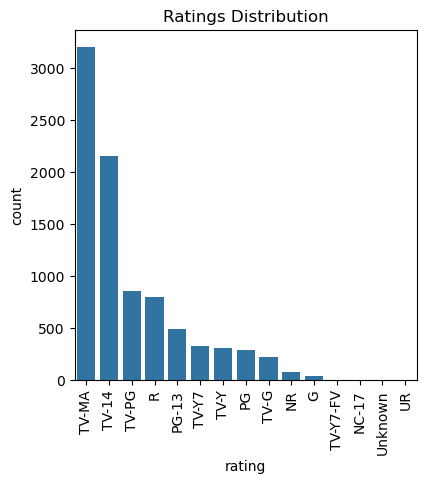

In [18]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 2)
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Ratings Distribution')
plt.show()

#  Ratings Distribution
- Visual: Bar Chart (Count by Rating Category)

- Analysis: The highest bars on the chart belong to TV-MA
(Mature Audience) and TV-14 (Parents Strongly Cautioned).
The R rating is the third most common.

- Insight: Netflix is primarily geared towards adult and young adult audiences.
Content rated for younger children (TV-Y, TV-G)

represents a significantly smaller portion of the library compared to mature content.

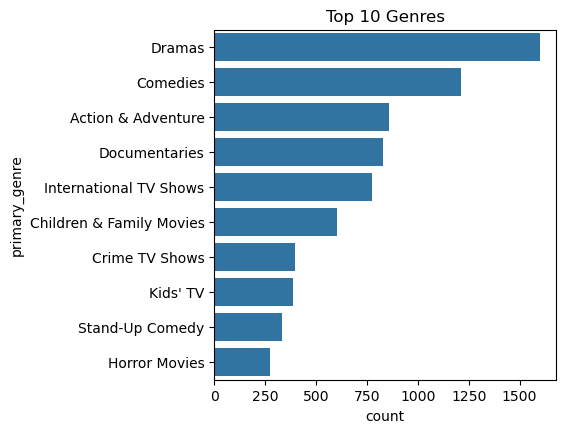

In [19]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 3)
sns.countplot(y='primary_genre', data=df, order=df['primary_genre'].value_counts().index[:10])
plt.title('Top 10 Genres')
plt.show()

#  Top 10 Genres
- Visual: Horizontal Bar Chart

- Analysis:

- Dramas are the most prevalent genre, followed closely by Comedies.

- Action & Adventure and Documentaries take the 3rd and 4th spots.

- Insight: The platform focuses on broad-appeal categories.
The high volume of Documentaries highlights Netflix's niche
as a major hub for non-fiction educational and crime content,
which is often cheaper to license or produce than scripted dramas.

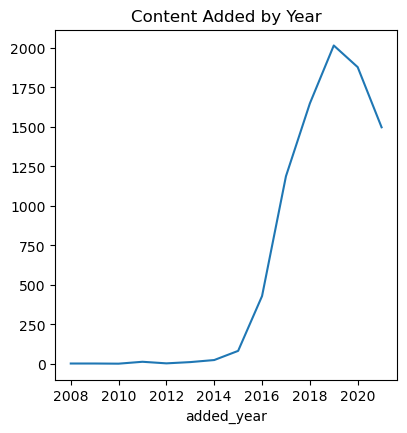

In [20]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 4)
df['added_year'].value_counts().sort_index().plot()
plt.title('Content Added by Year')
plt.show()
plt.show()

#  Content Added Over Time
- Visual: Line Chart (Time Series of added_year)

- Analysis: The line remains flat and near zero until approximately 2015, after which it spikes vertically, reaching a peak around 2019.

- Insight: This visualization captures Netflix's aggressive expansion phase. The "Streaming Wars" accelerated around 2016, forcing Netflix to drastically increase content ingestion. The drop-off seen at the very end of the chart likely reflects data collection cut-off dates or production slowdowns due to the global pandemic in 2020/2021.

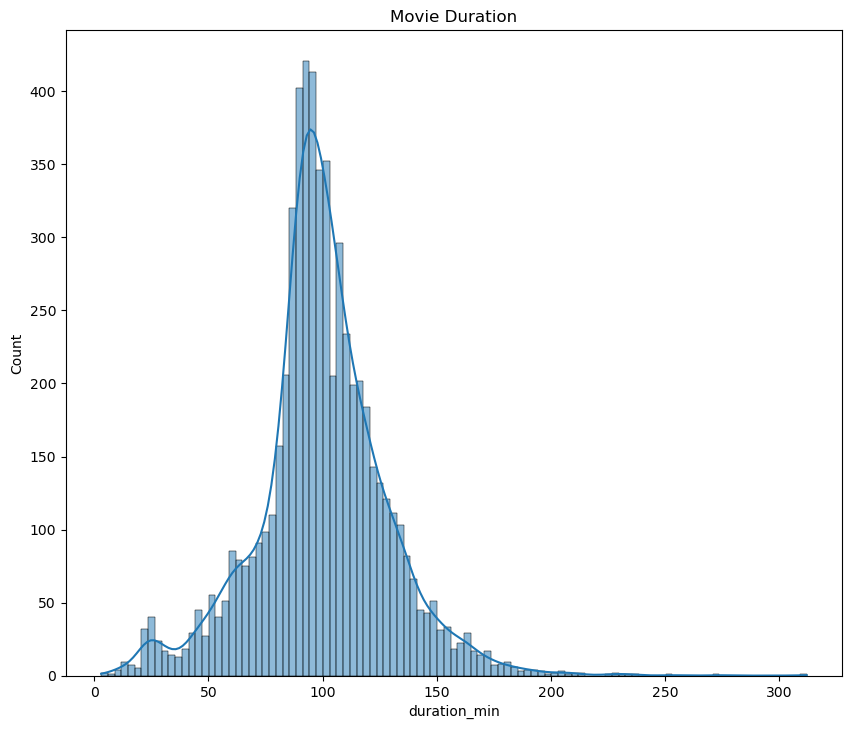

In [17]:
plt.figure(figsize=(25, 14))
plt.subplot(2, 3, 5)
sns.histplot(df['duration_min'], kde=True)
plt.title('Movie Duration')

plt.tight_layout()
plt.savefig('netflix_analysis.png')

#  Movie Duration Distribution
- Visual: Histogram with KDE (Bell Curve)

- Analysis: The graph shows a classic normal distribution (bell curve). The peak is centered between 90 and 100 minutes.

- Insight: Despite having no theatrical time constraints, streaming movies still adhere strictly to the industry standard runtime of 1.5 to 1.75 hours. Very short movies (<60 mins) and epic-length movies (>150 mins) are rare statistical outliers.

In [21]:
df.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              4
duration            0
listed_in           0
description         0
duration_min     2676
added_year         10
primary_genre       0
dtype: int64